In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'MSFT' , 'INFY']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'MSFT' , 'INFY']


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, MSFT, INFY]
company_name = ["APPLE", "MICROSOFT", "INFOSYS", "TATA CONSULTANCY SERVICES"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-29,17.129999,17.290001,17.049999,17.110001,17.110001,9559900,INFOSYS
2023-10-02,17.030001,17.190001,17.030001,17.180000,17.180000,4529900,INFOSYS
2023-10-03,17.090000,17.240000,16.980000,17.000000,17.000000,6775000,INFOSYS
2023-10-04,17.190001,17.450001,17.160000,17.440001,17.440001,7318800,INFOSYS
2023-10-05,17.520000,17.650000,17.459999,17.610001,17.610001,5069500,INFOSYS
2023-10-06,17.590000,17.860001,17.540001,17.790001,17.790001,5476600,INFOSYS
2023-10-09,17.580000,17.799999,17.530001,17.750000,17.750000,8642700,INFOSYS
2023-10-10,17.850000,18.000000,17.780001,17.850000,17.850000,11060900,INFOSYS
2023-10-11,17.860001,17.930000,17.549999,17.610001,17.610001,15897100,INFOSYS


In [ ]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object

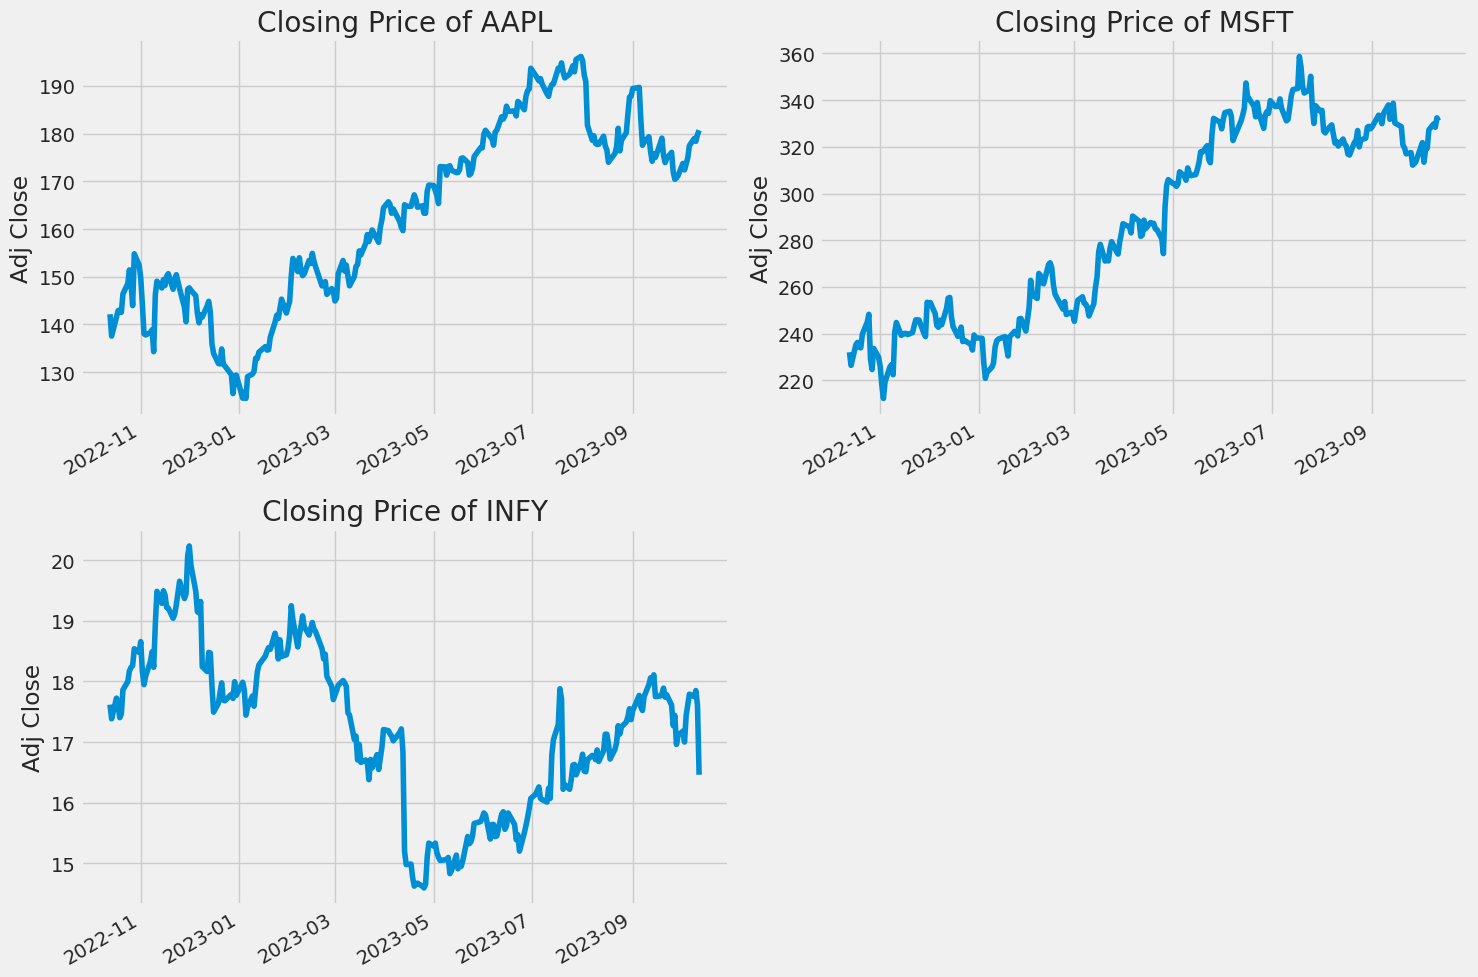

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

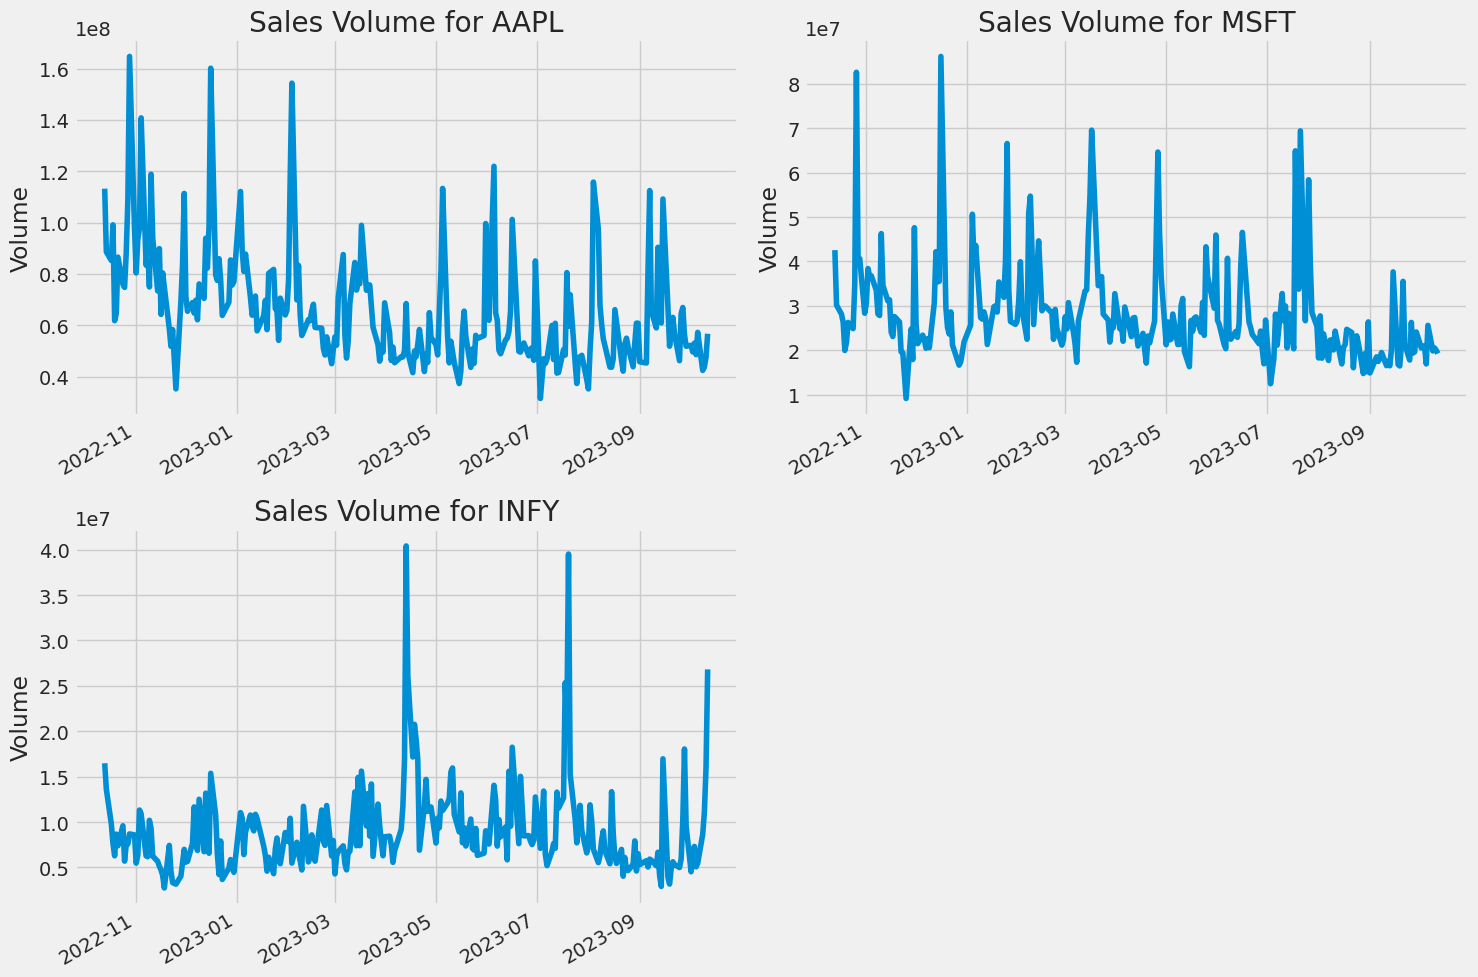

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

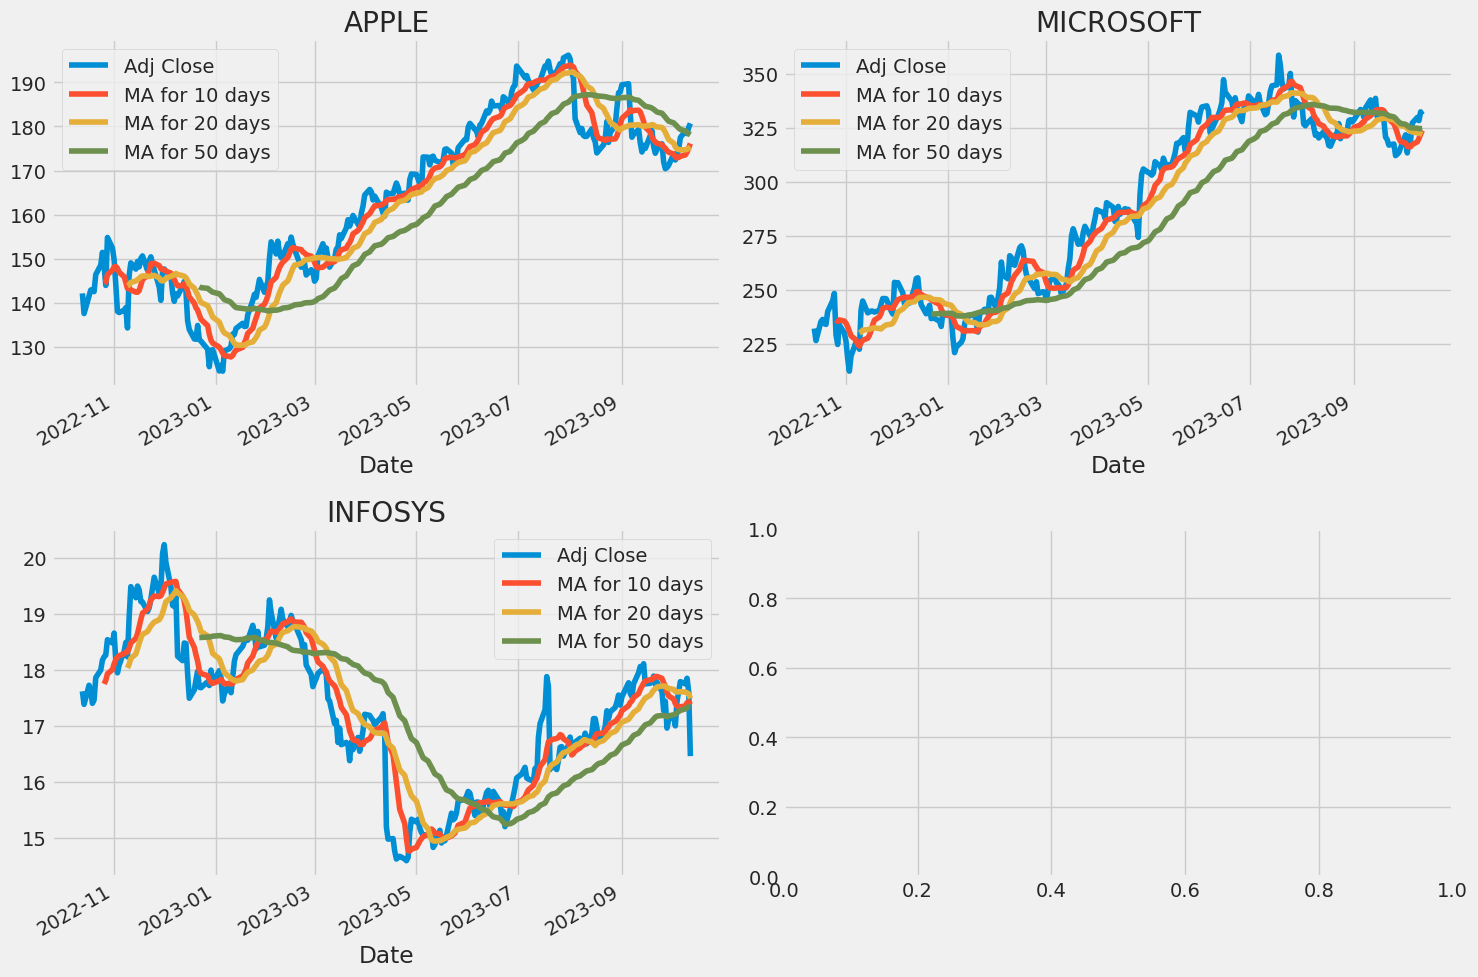

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MICROSOFT')

INFY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('INFOSYS')

fig.tight_layout()


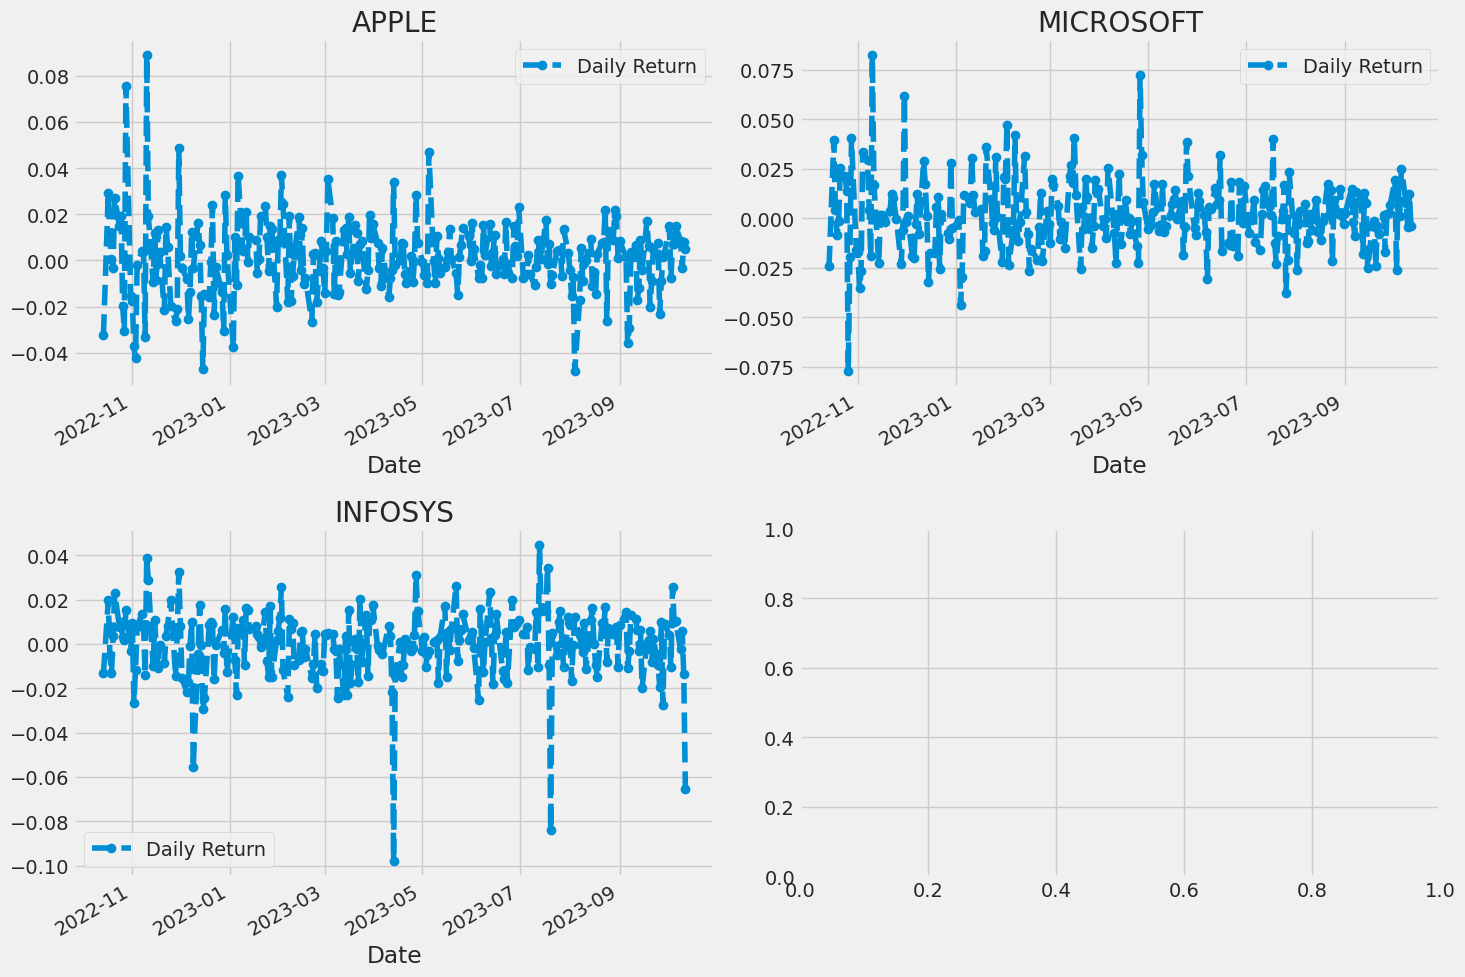

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

MSFT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('MICROSOFT')

INFY['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('INFOSYS')

fig.tight_layout()

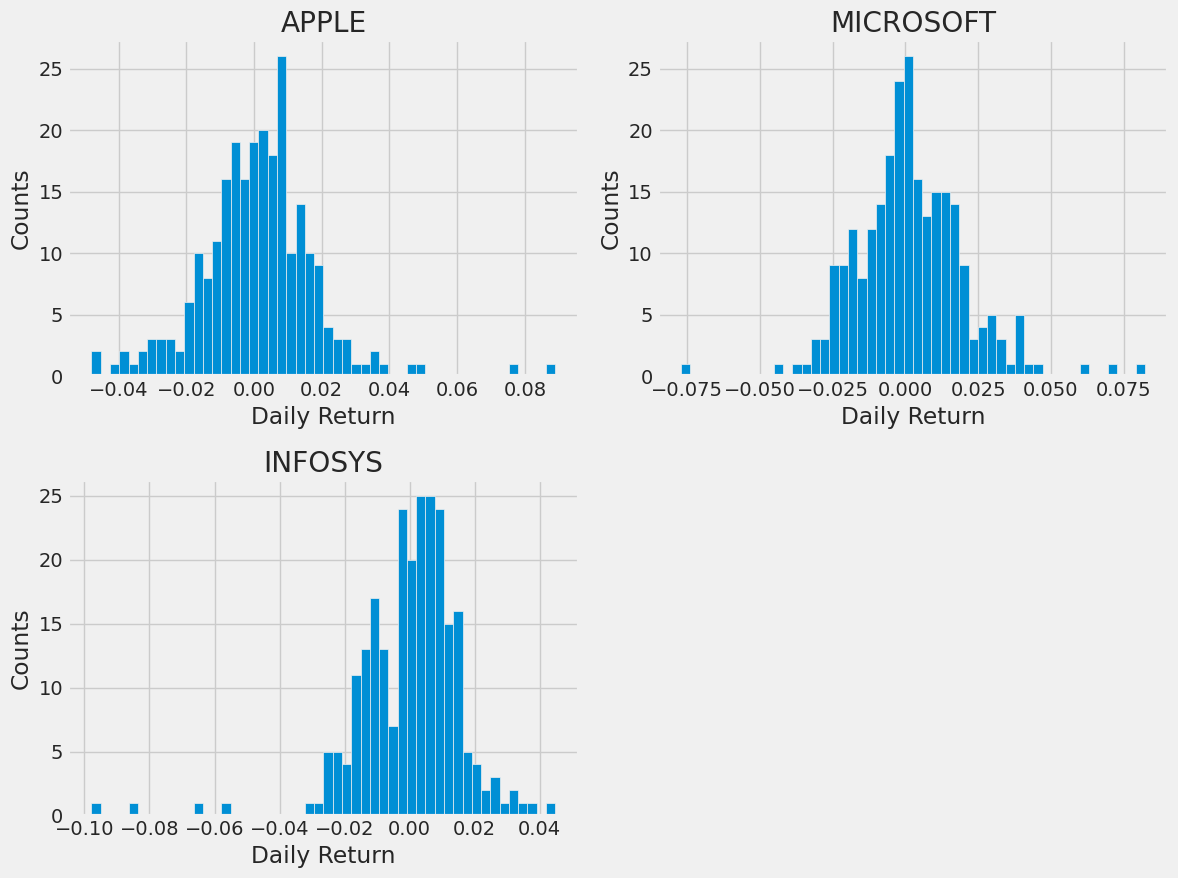

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()
closing_df.head()

[*********************100%%**********************]  3 of 3 completed


,AAPL,INFY,MSFT
Date,,,
2022-10-13,142.146729,17.617477,231.998734
2022-10-14,137.563919,17.383228,226.373062
2022-10-17,141.570160,17.724842,235.257233
2022-10-18,142.902252,17.636999,236.217941
2022-10-19,143.011612,17.402750,234.217285


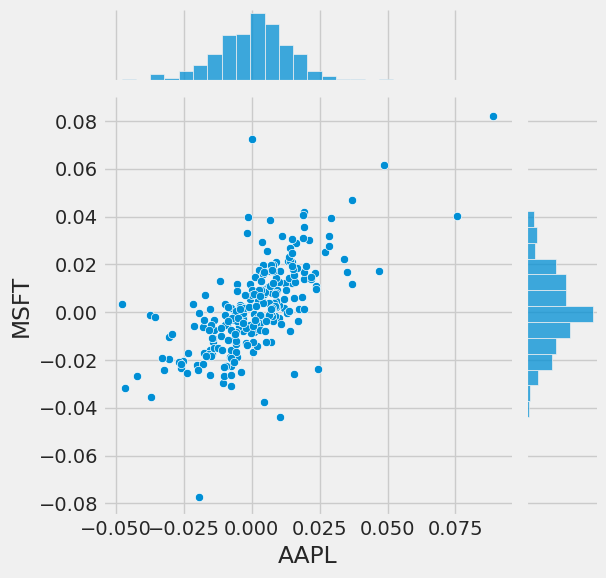

In [ ]:
sns.jointplot(x='AAPL', y='MSFT', data=tech_rets, kind='scatter')

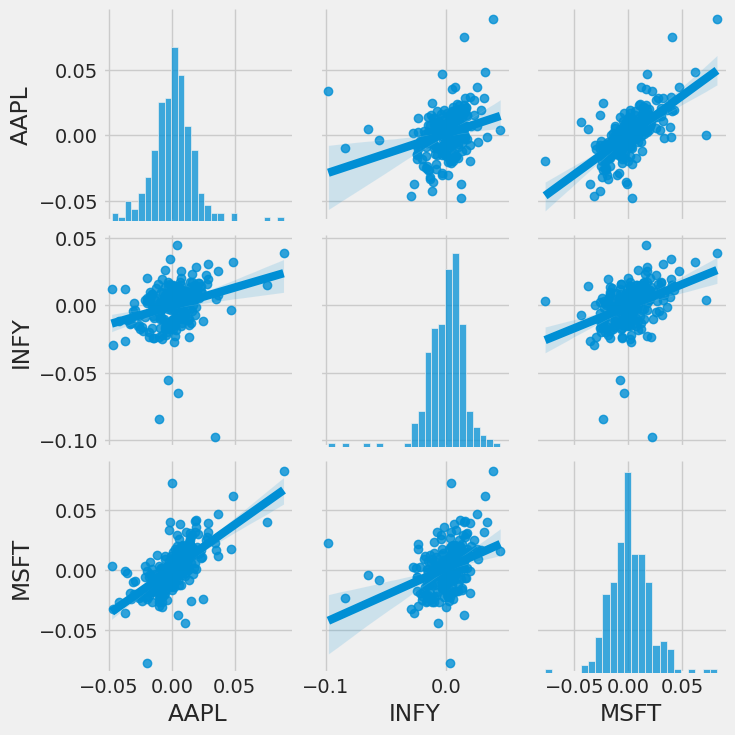

In [ ]:
sns.pairplot(tech_rets, kind='reg')

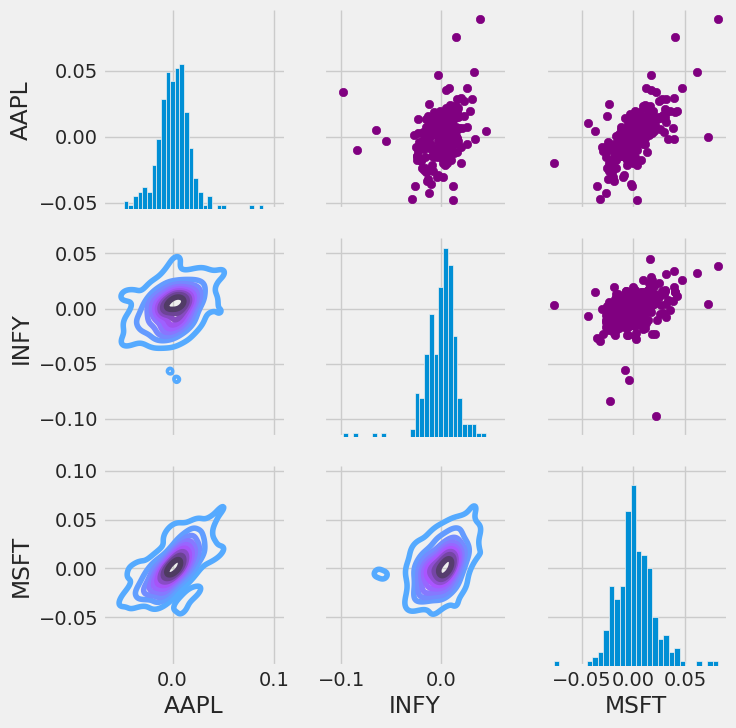

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

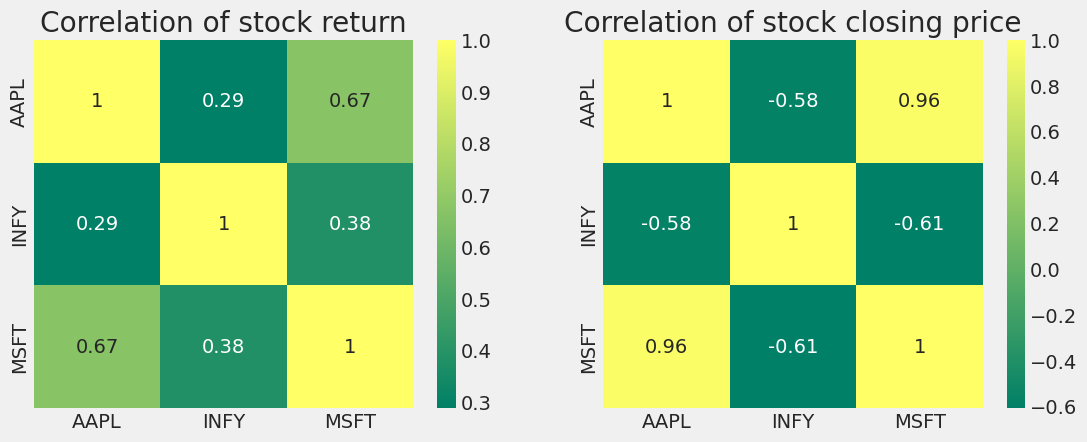

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

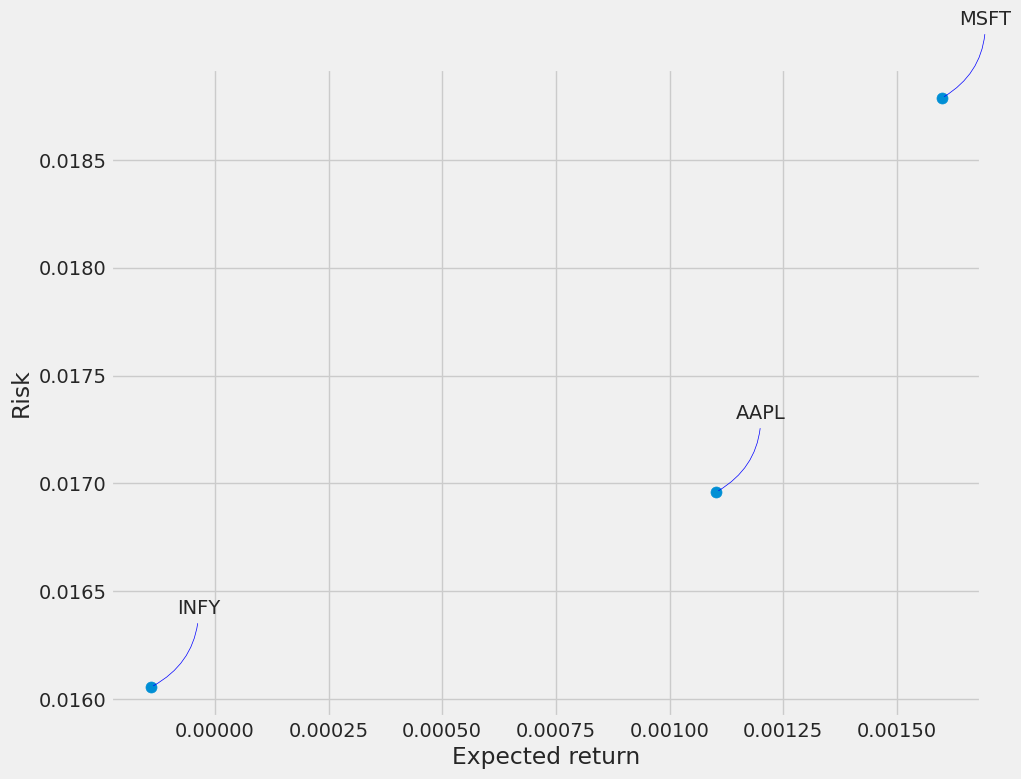

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#** Predicting the closing price stock price of APPLE**

In [ ]:
df = pdr.get_data_yahoo('AAPL', start='2018-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776527,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769421,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958794,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425121,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271263,82271200
...,...,...,...,...,...,...
2023-10-06,173.800003,177.990005,173.179993,177.490005,177.490005,57224100
2023-10-09,176.809998,179.050003,175.800003,178.990005,178.990005,42390800
2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000


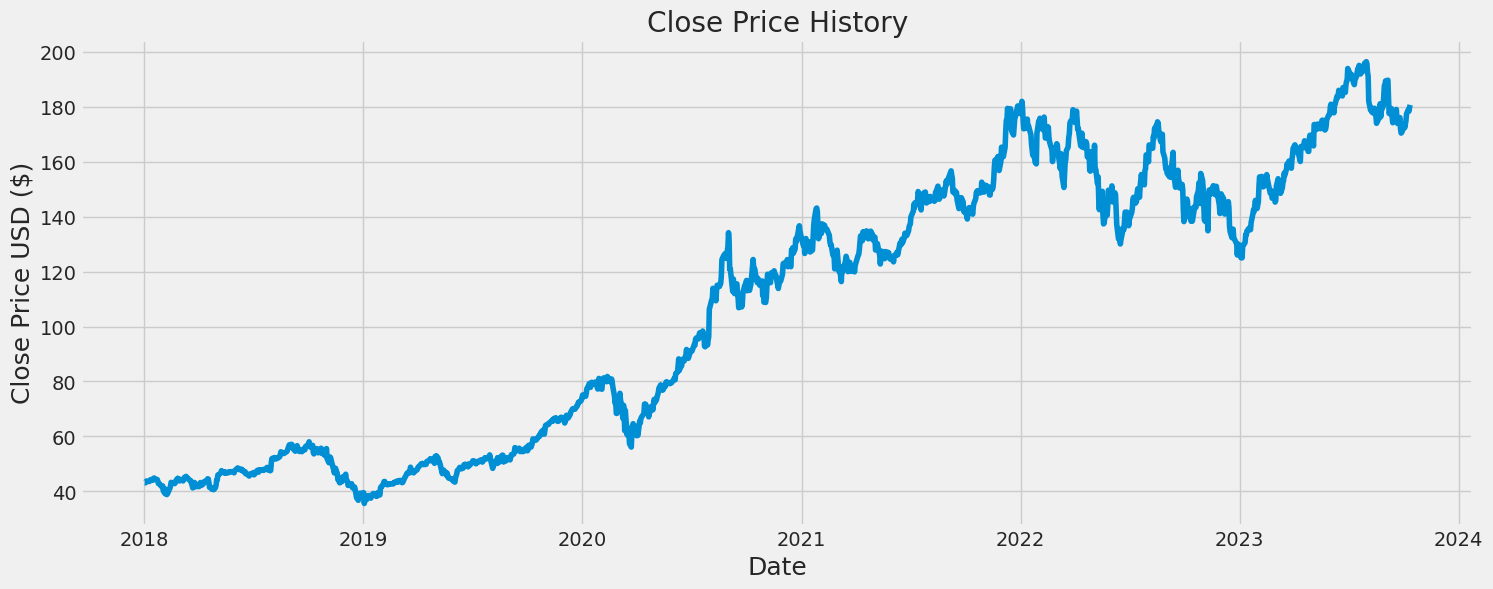

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1383

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04672083, 0.04667422, 0.04791721, 0.05097807, 0.04996816,
       0.04993707, 0.04987491, 0.05141312, 0.05422538, 0.05282702,
       0.0573484 , 0.05759698, 0.05635401, 0.05408555, 0.05414769,
       0.04976616, 0.04493404, 0.04555553, 0.04003978, 0.03850158,
       0.03921628, 0.0397601 , 0.0284489 , 0.02221843, 0.03237985,
       0.02695731, 0.02013641, 0.02209413, 0.03188267, 0.03441524,
       0.03912306, 0.04785507, 0.04698496, 0.04608382, 0.0448719 ,
       0.04709373, 0.05175494, 0.05714641, 0.05624524, 0.05582572,
       0.05097807, 0.05285811, 0.05380589, 0.05357281, 0.05102468,
       0.05399233, 0.05871567, 0.06141918, 0.05870014, 0.05632293,
       0.0566492 , 0.05567036, 0.0514442 , 0.05135098, 0.04518265,
       0.04142261, 0.03534749, 0.04751325, 0.04063019, 0.03774024])]
[0.03976009838304867]

[array([0.04672083, 0.04667422, 0.04791721, 0.05097807, 0.04996816,
       0.04993707, 0.04987491, 0.05141312, 0.05422538, 0.05282702,
       0.0573484 , 0.05759698, 0.05